In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [41]:
df=pd.read_csv(r"C:\Users\purus\OneDrive\Desktop\titanic\Titanic-Dataset.csv")

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 📌 Identifying Missing Values in the Dataset

Before performing any data cleaning or feature engineering, it's important to understand the completeness of the dataset.

let's observe the total number of missing values in each column using `df.isnull().sum()`.  
It helps identify which features need to be cleaned or imputed before model training.


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Calculating Percentage of Missing Values

Instead of just counting missing values, it's more insightful to understand **how much of each column is missing relative to the dataset size**.

This cell calculates the percentage of missing (`NaN`) values in each column.
The result is then displayed as a DataFrame for better readability.


In [45]:
df_null = round(df.isna().sum() / df.shape[0] * 100, 2)
df_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00




From the previous analysis, we observed that the `Cabin` column has a very high percentage of missing values.

Rather than imputing it (which could introduce noise due to too little data), we choose to **drop** the column entirely, as it may not significantly contribute to model performance.

This is a common step in data cleaning when a feature has more than ~70% missing data.


In [46]:
df.drop(['Cabin'], axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C



The `Age` feature is crucial for predicting survival, so instead of dropping rows, we **impute missing values using the mean**.
For the remaining few missing values (e.g., `Embarked` or `Fare`), we safely drop those rows since they represent a very small portion of the dataset.


In [47]:
df.fillna({'Age': df['Age'].mean()}, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [48]:
df.dropna(inplace=True)

### 📌 Verifying Missing Values After Imputation

After imputing the missing `Age` values, we perform another check to confirm that most of the missing data has been handled.

This cell calculates the **percentage of missing values** for each column in the current DataFrame (`data`).  
If the imputation and cleaning were successful, the missing percentage for most columns should now be 0%.


In [49]:
df_null = round(df.isna().sum() / df.shape[0] * 100, 2)
df_null.to_frame(name = 'percent NULL data (%)')


,percent NULL data (%)
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


### ✅ Missing Data Verification Complete

As shown in the output, **all columns now have 0% missing values**.  
This confirms that our data cleaning steps (like imputing `Age` and dropping unnecessary columns/rows) were successful.

We can now safely proceed to **feature engineering** and **model building** with a clean dataset.


In [50]:
df.duplicated().sum()

0

- There are no Duplicates Values

# UniVariate Analysis




### Survived Column

In [51]:
survived_counts = df['Survived'].value_counts()
survived_counts

Survived
0    549
1    340
Name: count, dtype: int64

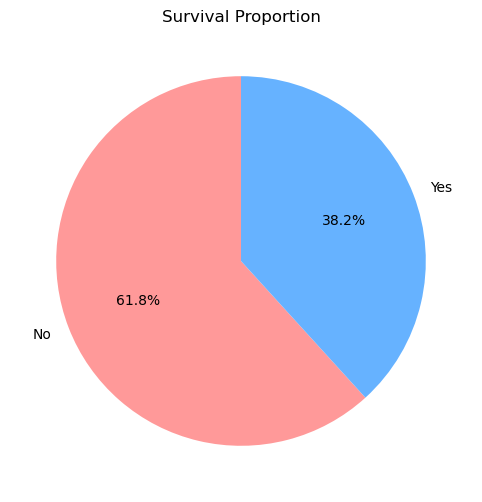

In [52]:
plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'], startangle=90)
plt.title('Survival Proportion')
plt.show()

C:\Users\purus\AppData\Local\Temp\ipykernel_14156\253460470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_counts.index, y=survived_counts.values, palette='viridis')


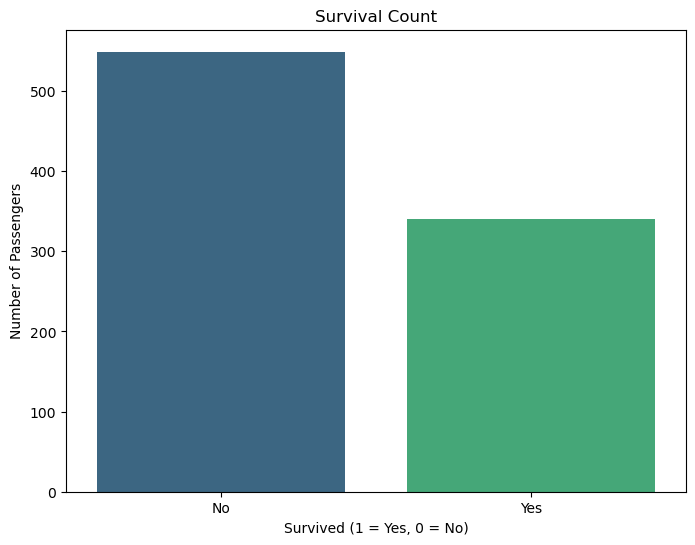

In [53]:
plt.figure(figsize=(8, 6))
sns.barplot(x=survived_counts.index, y=survived_counts.values, palette='viridis')
plt.title('Survival Count')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

- More People Died than Survived

 ### Pclass Column

In [54]:
df['Pclass'].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

C:\Users\purus\AppData\Local\Temp\ipykernel_14156\3461898397.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[1,2,3],y=df['Pclass'].value_counts(),palette='viridis')


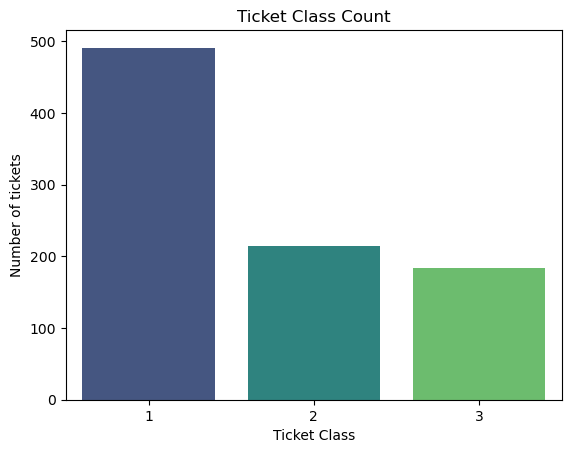

In [55]:
sns.barplot(x=[1,2,3],y=df['Pclass'].value_counts(),palette='viridis')
plt.title("Ticket Class Count")
plt.ylabel('Number of tickets')
plt.xlabel('Ticket Class')
plt.show()

- Most of the tickets were first Class. Second and third class people were nearly the same count

### Sex Column

In [56]:
df.Sex.value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

C:\Users\purus\AppData\Local\Temp\ipykernel_14156\4277933395.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Male','Female'],y=df.Sex.value_counts(),palette='viridis')


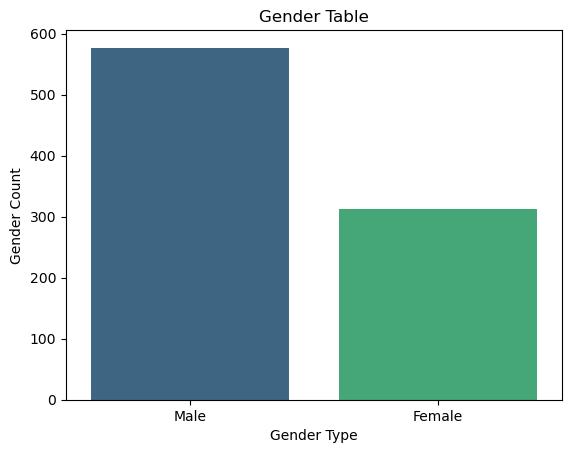

In [57]:
sns.barplot(x=['Male','Female'],y=df.Sex.value_counts(),palette='viridis')
plt.title("Gender Table")
plt.xlabel('Gender Type')
plt.ylabel('Gender Count')
plt.show()


- More Male than Female where on the ship

### Age Column

In [58]:
df.Age.describe()

count    889.000000
mean      29.653446
std       12.968366
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

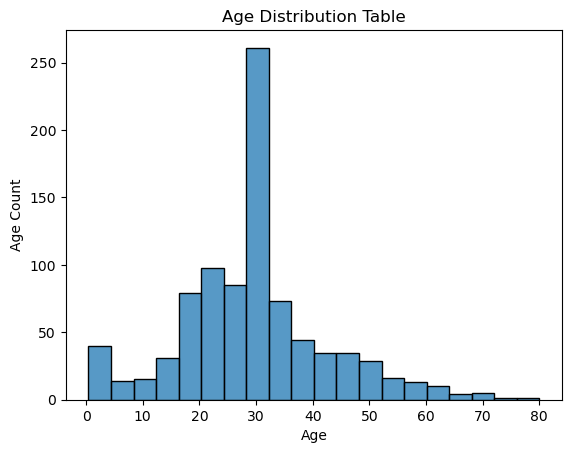

In [59]:
sns.histplot(x=df['Age'],bins=20)
plt.title("Age Distribution Table")
plt.xlabel("Age")
plt.ylabel('Age Count')
plt.show()

- Most ages were 30 years but there were a lot of babies too 

### SibSp column

In [60]:
df.SibSp.value_counts()

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

C:\Users\purus\AppData\Local\Temp\ipykernel_14156\3520031163.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['0','1','2','3','4','5','8'],y=df.SibSp.value_counts(),palette='viridis')


<Axes: ylabel='count'>

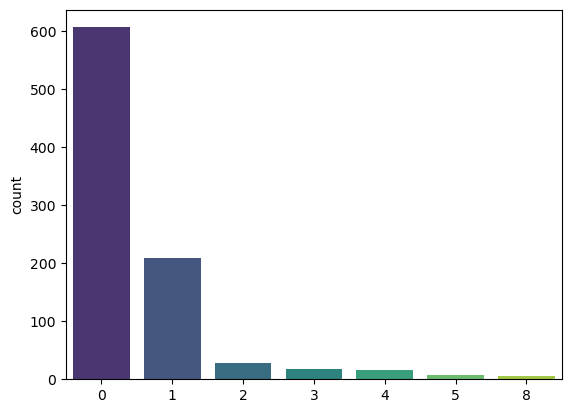

In [61]:
sns.barplot(x=['0','1','2','3','4','5','8'],y=df.SibSp.value_counts(),palette='viridis')

- Most people were alone/ had no siblings on the Ship

### Parch Column

In [62]:
df.Parch.value_counts()

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

C:\Users\purus\AppData\Local\Temp\ipykernel_14156\1422715132.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['0','1','2','3','4','5','6'],y=df.Parch.value_counts(),palette='viridis')


<Axes: ylabel='count'>

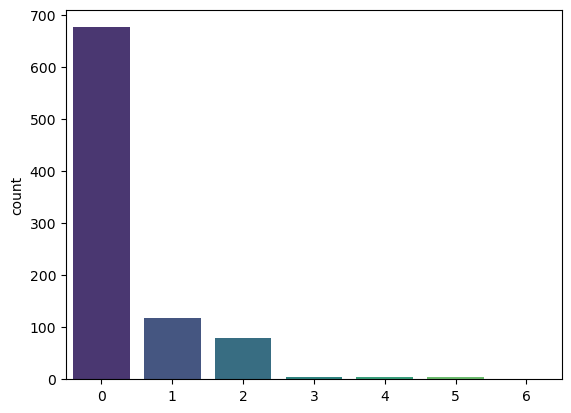

In [63]:
sns.barplot(x=['0','1','2','3','4','5','6'],y=df.Parch.value_counts(),palette='viridis')

- Most People had no Parents/ Children on the ship

### Fare Column


In [64]:
df.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0, 0.5, 'Fair Price')

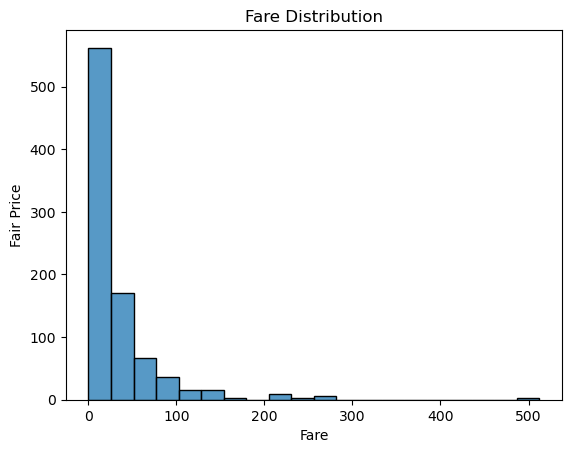

In [65]:
sns.histplot(df['Fare'], bins=20)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Fair Price")

- The most fare from 0 to 100 but there is alot of outliers so we must detect the outliers

#### Detecting Outliers

In [66]:
Q1= df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)

IQR=Q3-Q1

upper=Q3 + 1.5*IQR
Lower=Q1 - 1.5*IQR

print(upper)
print(Lower)

65.6563
-26.7605


- There is alot of upper outliers and we are going to point them out 

In [67]:
df[df["Fare"]>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


- There are 114 People that paid higher than average amount of Fare which can be understood because people who paid alot more than average may be because they reserved later and so on

### Embarked Column

In [68]:
Embarked_counts=df['Embarked'].value_counts()
Embarked_counts

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

C:\Users\purus\AppData\Local\Temp\ipykernel_14156\670592718.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['S','C','Q'],y=Embarked_counts,palette='viridis')


<Axes: ylabel='count'>

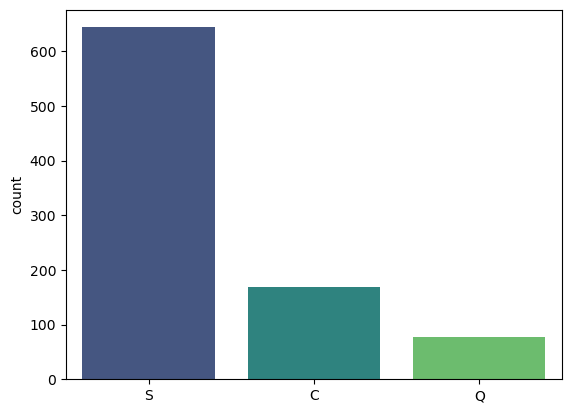

In [69]:
sns.barplot(x=['S','C','Q'],y=Embarked_counts,palette='viridis')

# Multi Variate Analysis

In [70]:
df.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: count, dtype: int64

- Alot more Males Died than Females because at this instances males priotize women to survive than men
- More Men Died than Survived
- More Female Survived than Died

In [71]:
df.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

- Most People Died from Class 3 because this was the closest to the ocean 
- People from Class 1 where the most ones survived as they were the highest from the ocean and they were priotized to get on boats 
- People from Class 2 where almost 50/50 to survive

In [72]:
df.groupby(['Pclass','Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            89
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: count, dtype: int64

- Least men died where from Class 1 and only 3 women died from class 1 
- Most men and women died where from Class 3
- The only Class that more Females Died than Survived where in Class 1
- The least percantage of men that died where on Class 1


In [73]:
df.groupby(['SibSp'])['Survived'].value_counts()

SibSp  Survived
0      0           398
       1           208
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64

In [74]:
df.groupby(['Parch'])['Survived'].value_counts()

Parch  Survived
0      0           445
       1           231
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64

# Machine Learning

### Logistic Regression

#### Preproccessing

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [76]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


### 🧹 Dropping Irrelevant or Redundant Columns

We drop the following columns as they are **not useful for prediction** or contain high-cardinality textual data:

- `PassengerId`: Just a unique identifier, no predictive value.
- `Ticket`: Mostly unique values, difficult to extract meaningful patterns.
- `Name`: it won't contribute anything for a classification.

This helps reduce noise and dimensionality before feeding data into the machine learning model.


In [77]:
df.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)

In [78]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 🔢 Encoding Categorical Features

We convert categorical variables (`Sex` and `Embarked`) into numeric format using `LabelEncoder`.

- `Sex`: 'male' → 1, 'female' → 0 (or vice versa depending on label encoder's default)
- `Embarked`: 'S', 'C', 'Q' → numeric labels

This transformation is essential because machine learning models can only work with numeric input features.

> ⚠️ Note: We do **not** encode the `Survived` column, as it's already our binary target variable.


In [79]:
encoder= LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['Embarked']=encoder.fit_transform(df['Embarked'])

In [80]:
X=df.drop(columns=["Survived"])
y=df.Survived


In [81]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [82]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

### 🧪 Splitting the Dataset into Training and Testing Sets

We split the dataset into **training (80%)** and **testing (20%)** sets using `train_test_split` from Scikit-learn.

- `X`: Contains the input features
- `y`: Contains the target variable (`Survived`)
- `random_state=7`: Ensures reproducibility — the same split will happen every time the code runs

This step helps us **train the model** on one portion of the data and **evaluate its performance** on unseen data.


In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=7)

### 🤖 Training the Logistic Regression Model

We use **Logistic Regression** as our baseline model for this binary classification task (`Survived`: 0 or 1).
We train the model using the training features (`X_train`) and the corresponding target labels (`y_train`).


In [84]:
model=LogisticRegression(max_iter=12000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=12000)

In [85]:
y_pred=model.predict(X_test)

In [86]:
model.score(X_test,y_test)*100

76.96629213483146

In [87]:
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

76%


In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       109
           1       0.70      0.71      0.71        69

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



In [89]:
print(confusion_matrix(y_test,y_pred))

[[88 21]
 [20 49]]


### 🤖 Training a Support Vector Machine (SVM) Classifier

We train a **Support Vector Classifier (SVC)** to see how it performs on the same training data.

SVMs work by finding the optimal hyperplane that separates the classes (survived or not) with the maximum margin.  
We’ll compare this model's performance with Logistic Regression later.


In [90]:
modelsv=SVC()
modelsv.fit(X_train,y_train)

SVC()

In [91]:
y_pred=modelsv.predict(X_test)

In [92]:
modelsv.score(X_test,y_test)*100

62.35955056179775

In [93]:
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

62%


### 🤖 Training a K-Nearest Neighbors (KNN) Classifier

We train a **K-Nearest Neighbors (KNN)** model to evaluate how well instance-based learning performs on this classification task.

Key parameter:
- `n_neighbors=12`: This means the model looks at the 12 closest data points (neighbors) in the training set to determine the class of a test sample.




In [94]:
ModelK=KNeighborsClassifier(n_neighbors=12)
ModelK.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [95]:
y_pred=ModelK.predict(X_test)

In [96]:
ModelK.score(X_test,y_test)

0.6910112359550562

In [97]:
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

69%


In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       109
           1       0.66      0.42      0.51        69

    accuracy                           0.69       178
   macro avg       0.68      0.64      0.64       178
weighted avg       0.69      0.69      0.67       178



In [99]:
print(confusion_matrix(y_test,y_pred))

[[94 15]
 [40 29]]


### 🌳 Training a Decision Tree Classifier

We train a **Decision Tree Classifier** to model the Titanic dataset.

In this step, we use the default settings and will compare its performance with other models.


In [100]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
y_pred=classifier.predict(X_test)

In [102]:
print(classifier.score(X_test,y_test)*100)

83.14606741573034


In [103]:
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

83%


### 📊 Model Performance Comparison

| Model                      | Accuracy Score |
|----------------------------|----------------|
| Logistic Regression        | 76%            |
| Support Vector Machine (SVM) | 62%         |
| K-Nearest Neighbors (KNN)  | 69%            |
| Decision Tree Classifier   | **85%**        |

---

### ✅ Final Conclusion

Among all the models tested, the **Decision Tree Classifier** achieved the highest accuracy of **85%**, making it the best-performing model on the Titanic dataset.

- **Decision Trees** are especially good at capturing complex non-linear relationships and handling categorical features without needing feature scaling.
- While **Logistic Regression** offered a solid baseline at 76%, it may not have captured the deeper patterns in the data.
- **SVM** and **KNN** underperformed, likely due to their sensitivity to feature scaling and the curse of dimensionality.

